In [188]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_logP = {}
    for index, row in df_main.iterrows():
        SMILES = row['Amides for LogP']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_logP[SMILES] = row['LogP']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\train.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\test.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES

In [189]:
"""atom sum relevance in fluorine group withour hydrogens, not scaled, SME relevance with nitrogen in same subgroup"""
relevances_fluorine = {'O=C(N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F)c1ccccc1': 0.338, 'O=C(N[C@H]1C[C@@H]2[C@H](C1)C2(F)F)c1ccccc1': 0.148, 'O=C(NC1CCC(F)(F)CC1)c1ccccc1': 0.042, 'O=C(NC1CCCCC1)c1ccccc1': 0.25168076157569885, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)c1ccccc1': 0.5223082304000854, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)c1ccccc1': 0.46693912148475647, 'O=C(NC1(C(F)(F)F)CCC1)c1ccccc1': 0.28, 'O=C(NC1(C(F)F)CCC1)c1ccccc1': 0.168, 'O=C(NC1(CF)CCC1)c1ccccc1': 0.083, 'O=C(NC1CCC1)c1ccccc1': 0.017673790454864502, 'O=C(N[C@H]1C[C@H](C(F)(F)F)C1)c1ccccc1': 0.371, 'O=C(N[C@H]1C[C@@H](C(F)(F)F)C1)c1ccccc1': 0.371, 'O=C(N[C@H]1C[C@H](C(F)F)C1)c1ccccc1': 0.023, 'O=C(N[C@H]1C[C@@H](C(F)F)C1)c1ccccc1': 0.023, 'O=C(N[C@H]1C[C@H](CF)C1)c1ccccc1': -0.236, 'O=C(N[C@H]1C[C@@H](CF)C1)c1ccccc1': -0.236, 'O=C(NCC(F)(F)F)c1ccccc1': 0.405, 'O=C(NCC(F)F)c1ccccc1': 0.07, 'O=C(NCCF)c1ccccc1': -0.294, 'CNC(=O)c1ccccc1': -0.02199365198612213, 'O=C(NCCC(F)(F)F)c1ccccc1': 0.276, 'O=C(NCCC(F)F)c1ccccc1': -0.067, 'O=C(NCCCF)c1ccccc1': -0.253, 'CCNC(=O)c1ccccc1': -0.10657616704702377, 'O=C(NCCCCF)c1ccccc1': -0.138, 'O=C(NCCCC(F)F)c1ccccc1': -0.083, 'O=C(NCCCC(F)(F)F)c1ccccc1': 0.181, 'CCCNC(=O)c1ccccc1': -0.2789619266986847, 'O=C(NC1CC1(F)F)c1ccccc1': -0.014, 'O=C(NC1CCC1(F)F)c1ccccc1': -0.037, 'O=C(NC1CC(F)(F)C1)c1ccccc1': -0.016, 'O=C(NC1CCCC1(F)F)c1ccccc1': 0.008, 'O=C(NC1CCC(F)(F)C1)c1ccccc1': 0.02, 'O=C(NC1CCCCC1(F)F)c1ccccc1': 0.015, 'O=C(NC1CCCC(F)(F)C1)c1ccccc1': 0.063, 'O=C(NC1CCCCCC1(F)F)c1ccccc1': 0.028, 'O=C(NC1CCCCC(F)(F)C1)c1ccccc1': 0.097, 'O=C(NC1CCCC(F)(F)CC1)c1ccccc1': 0.094, 'CCC(F)(F)CNC(=O)c1ccccc1': 0.115, 'CC(F)(F)CCNC(=O)c1ccccc1': -0.067, 'O=C(NC1CC1)c1ccccc1': -0.3971778154373169, 'O=C(NC1CCCC1)c1ccccc1': 0.17707771062850952, 'O=C(NC1CCCCCC1)c1ccccc1': 0.2817718982696533, 'CCCCNC(=O)c1ccccc1': -0.11100098490715027, 'O=C(NC1CC2(CCC2)C1)c1ccccc1': 0.062232136726379395, 'O=C(NC1CC2(CC(F)C2)C1)c1ccccc1': 0.105, 'O=C(NC1CC2(C1)CC(F)(F)C2)c1ccccc1': 0.025, 'O=C(N[C@@H]1CC[C@H]1C(F)(F)F)c1ccccc1': 0.476, 'O=C(N[C@@H]1CC[C@H]1C(F)F)c1ccccc1': 0.001, 'O=C(N[C@@H]1CC[C@H]1CF)c1ccccc1': -0.018, 'O=C(N[C@@H]1C[C@H]1C(F)(F)F)c1ccccc1': 0.458, 'O=C(N[C@H]1C[C@H]1C(F)(F)F)c1ccccc1': 0.484, 'O=C(N[C@@H]1C[C@H]1C(F)F)c1ccccc1': -0.096, 'O=C(N[C@H]1C[C@H]1C(F)F)c1ccccc1': -0.254, 'C[C@@H]1C[C@H]1NC(=O)c1ccccc1': -0.0669473260641098, 'C[C@@H]1C[C@@H]1NC(=O)c1ccccc1': -0.762570858001709, 'O=C(N[C@@H]1C[C@H]1CF)c1ccccc1': -0.152, 'O=C(N[C@@H]1C[C@@H]1CF)c1ccccc1': -0.492, 'O=C(NC1CC12CC2)c1ccccc1': -0.24052494764328003, 'O=C(NC1C(F)(F)C12CC2)c1ccccc1': -0.042, 'O=C(NC1CC12CC2(F)F)c1ccccc1': 0.039}

# cyclopropane = {2: {'H': [-0.4]}}
# cyclobutane = {1: {'H': [0.02]}, 2: {'H': [0.02]}, 3: {'H': [0.02]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {2: {'H': [0.18]}, 3: {'H': [0.18]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {2: {'H': [0.25]}, 3: {'H': [0.25]}, 4: {'H': [0.25]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# cycloheptane = {2: {'H': [0.28]}, 3: {'H': [0.28]}, 4: {'H': [0.28]}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
# methane = {1: {'H': [-0.62]}, 2: {'H': [-0.41]}, 3: {'H': [-0.28]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

cyclopropane = {1: {'H': [-0.4]}, 2: {'H': [-0.4]}}
cyclobutane = {1: {'H': [0.02]}, 2: {'H': [0.02]}, 3: {'H': [0.02]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {'H': [0.18]}, 2: {'H': [0.18]}, 3: {'H': [0.18]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {'H': [0.25]}, 2: {'H': [0.25]}, 3: {'H': [0.25]}, 4: {'H': [0.25]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {'H': [0.28]}, 2: {'H': [0.28]}, 3: {'H': [0.28]}, 4: {'H': [0.28]}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {'H': [-0.62]}, 2: {'H': [-0.41]}, 3: {'H': [-0.28]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

"""atom sum relevance in fluorine group withour hydrogens, not scaled, SME relevance with nitrogen in different subgroups"""
# relevances_fluorine = {'CCC(F)(F)CC(=O)Nc1ccccc1': 0.152, 'CC(F)(F)CCC(=O)Nc1ccccc1': 0.042, 'O=C(CCCC(F)F)Nc1ccccc1': 0.138, 'CCCCC(=O)Nc1ccccc1': 0.3896028995513916, 'O=C(N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F)c1ccccc1': 0.26, 'O=C(N[C@H]1C[C@@H]2[C@H](C1)C2(F)F)c1ccccc1': 0.177, 'O=C(NC1CCC(F)(F)CC1)c1ccccc1': 0.178, 'O=C(NC1CCCCC1)c1ccccc1': 0.560988187789917, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)c1ccccc1': 0.7129870653152466, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)c1ccccc1': 0.80442875623703, 'O=C(NC1(C(F)(F)F)CCC1)c1ccccc1': 0.297, 'O=C(NC1(C(F)F)CCC1)c1ccccc1': 0.256, 'O=C(NC1(CF)CCC1)c1ccccc1': 0.275, 'O=C(NC1CCC1)c1ccccc1': 0.5008782148361206, 'O=C(N[C@H]1C[C@H](C(F)(F)F)C1)c1ccccc1': 0.429, 'O=C(N[C@H]1C[C@@H](C(F)(F)F)C1)c1ccccc1': 0.429, 'O=C(N[C@H]1C[C@H](C(F)F)C1)c1ccccc1': 0.145, 'O=C(N[C@H]1C[C@@H](C(F)F)C1)c1ccccc1': 0.145, 'O=C(N[C@H]1C[C@H](CF)C1)c1ccccc1': -0.078, 'O=C(N[C@H]1C[C@@H](CF)C1)c1ccccc1': -0.078, 'O=C(NCC(F)(F)F)c1ccccc1': 0.445, 'O=C(NCC(F)F)c1ccccc1': 0.163, 'O=C(NCCF)c1ccccc1': -0.095, 'CNC(=O)c1ccccc1': -0.7616559267044067, 'O=C(NCCC(F)(F)F)c1ccccc1': 0.353, 'O=C(NCCC(F)F)c1ccccc1': 0.131, 'O=C(NCCCF)c1ccccc1': 0.079, 'CCNC(=O)c1ccccc1': -1.3287261724472046, 'O=C(NCCCCF)c1ccccc1': 0.114, 'O=C(NCCCC(F)F)c1ccccc1': 0.173, 'O=C(NCCCC(F)(F)F)c1ccccc1': 0.309, 'CCCNC(=O)c1ccccc1': 0.8204017877578735, 'O=C(NC1CC1(F)F)c1ccccc1': 0.104, 'O=C(NC1CCC1(F)F)c1ccccc1': 0.062, 'O=C(NC1CC(F)(F)C1)c1ccccc1': 0.12, 'O=C(NC1CCCC1(F)F)c1ccccc1': 0.114, 'O=C(NC1CCC(F)(F)C1)c1ccccc1': 0.091, 'O=C(NC1CCCCC1(F)F)c1ccccc1': 0.105, 'O=C(NC1CCCC(F)(F)C1)c1ccccc1': 0.145, 'O=C(NC1CCCCCC1(F)F)c1ccccc1': 0.118, 'O=C(NC1CCCCC(F)(F)C1)c1ccccc1': 0.178, 'O=C(NC1CCCC(F)(F)CC1)c1ccccc1': 0.201, 'CCC(F)(F)CNC(=O)c1ccccc1': 0.178, 'CC(F)(F)CCNC(=O)c1ccccc1': 0.095, 'O=C(NC1CC1)c1ccccc1': 0.022959589958190918, 'O=C(NC1CCCC1)c1ccccc1': 0.6632416248321533, 'O=C(NC1CCCCCC1)c1ccccc1': 0.5922598838806152, 'CCCCNC(=O)c1ccccc1': 0.640187680721283, 'O=C(NC1CC2(CCC2)C1)c1ccccc1': 0.3718070387840271, 'O=C(NC1CC2(CC(F)C2)C1)c1ccccc1': 0.319, 'O=C(NC1CC2(C1)CC(F)(F)C2)c1ccccc1': 0.131, 'O=C(N[C@@H]1CC[C@H]1C(F)(F)F)c1ccccc1': 0.496, 'O=C(N[C@@H]1CC[C@H]1C(F)F)c1ccccc1': 0.054, 'O=C(N[C@@H]1CC[C@H]1CF)c1ccccc1': 0.039, 'O=C(N[C@@H]1C[C@H]1C(F)(F)F)c1ccccc1': 0.481, 'O=C(N[C@H]1C[C@H]1C(F)(F)F)c1ccccc1': 0.443, 'O=C(N[C@@H]1C[C@H]1C(F)F)c1ccccc1': -0.052, 'O=C(N[C@H]1C[C@H]1C(F)F)c1ccccc1': -0.031, 'C[C@@H]1C[C@H]1NC(=O)c1ccccc1': 0.13418659567832947, 'C[C@@H]1C[C@@H]1NC(=O)c1ccccc1': 0.07086768001317978, 'O=C(N[C@@H]1C[C@H]1CF)c1ccccc1': -0.076, 'O=C(N[C@@H]1C[C@@H]1CF)c1ccccc1': -0.185, 'O=C(NC1CC12CC2)c1ccccc1': 0.19524338841438293, 'O=C(NC1C(F)(F)C12CC2)c1ccccc1': 0.023, 'O=C(NC1CC12CC2(F)F)c1ccccc1': 0.104}

# cyclobutane = {1: {'H': [-0.27]}, 2: {'H': [-0.27]}} # logP_O=C(N1CCC1)C1=CC=CC=C1
# cyclopentane = {1: {'H': [-0.21]}, 2: {'H': [-0.21]}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
# cyclohexan = {1: {'H': [-0.21]}, 2: {'H': [-0.21]}, 3: {'H': [-0.21]}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
# methane = {1: {'H': [-0.62]}, 2: {'H': [-0.41]}, 3: {'H': [-0.28]}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP = prepare_data()
train_smiles, test_smiles = train_test_smiles_data()

In [190]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [191]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_primary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

O=C(N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F)c1ccccc1 ((8, 9), (8, 10)) gem-CF2 4
O=C(N[C@H]1C[C@@H]2[C@H](C1)C2(F)F)c1ccccc1 ((8, 9), (8, 10)) gem-CF2 4
O=C(NC1CCC(F)(F)CC1)c1ccccc1 ((6, 7), (6, 8)) gem-CF2 4
O=C(NC1CCCCC1)c1ccccc1 () non-F inf
O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)c1ccccc1 () non-F inf
O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)c1ccccc1 () non-F inf
O=C(NC1(C(F)(F)F)CCC1)c1ccccc1 ((3, 4, 5, 6, 7),) CF3 1
O=C(NC1(C(F)F)CCC1)c1ccccc1 ((3, 4, 5, 6),) CHF2 1
O=C(NC1(CF)CCC1)c1ccccc1 ((3, 4, 5),) CH2F 1
O=C(NC1CCC1)c1ccccc1 () non-F inf
O=C(N[C@H]1C[C@H](C(F)(F)F)C1)c1ccccc1 ((5, 6, 7, 8, 9),) CF3 3
O=C(N[C@H]1C[C@@H](C(F)(F)F)C1)c1ccccc1 ((5, 6, 7, 8, 9),) CF3 3
O=C(N[C@H]1C[C@H](C(F)F)C1)c1ccccc1 ((5, 6, 7, 8),) CHF2 3
O=C(N[C@H]1C[C@@H](C(F)F)C1)c1ccccc1 ((5, 6, 7, 8),) CHF2 3
O=C(N[C@H]1C[C@H](CF)C1)c1ccccc1 ((5, 6, 7),) CH2F 3
O=C(N[C@H]1C[C@@H](CF)C1)c1ccccc1 ((5, 6, 7),) CH2F 3
O=C(NCC(F)(F)F)c1ccccc1 ((3, 4, 5, 6, 7),) CF3 1
O=C(NCC(F)F)c1ccccc1 ((3, 4, 5, 6),) CHF2 1
O=C(NCCF)c1ccccc1 ((3, 4

In [192]:
for smiles, distance in smiles_to_distance_to_nitrogen.items():
    if distance < 5:
        print(smiles)

O=C(N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F)c1ccccc1
O=C(N[C@H]1C[C@@H]2[C@H](C1)C2(F)F)c1ccccc1
O=C(NC1CCC(F)(F)CC1)c1ccccc1
O=C(NC1(C(F)(F)F)CCC1)c1ccccc1
O=C(NC1(C(F)F)CCC1)c1ccccc1
O=C(NC1(CF)CCC1)c1ccccc1
O=C(N[C@H]1C[C@H](C(F)(F)F)C1)c1ccccc1
O=C(N[C@H]1C[C@@H](C(F)(F)F)C1)c1ccccc1
O=C(N[C@H]1C[C@H](C(F)F)C1)c1ccccc1
O=C(N[C@H]1C[C@@H](C(F)F)C1)c1ccccc1
O=C(N[C@H]1C[C@H](CF)C1)c1ccccc1
O=C(N[C@H]1C[C@@H](CF)C1)c1ccccc1
O=C(NCC(F)(F)F)c1ccccc1
O=C(NCC(F)F)c1ccccc1
O=C(NCCF)c1ccccc1
CNC(=O)c1ccccc1
O=C(NCCC(F)(F)F)c1ccccc1
O=C(NCCC(F)F)c1ccccc1
O=C(NCCCF)c1ccccc1
CCNC(=O)c1ccccc1
O=C(NCCCCF)c1ccccc1
O=C(NCCCC(F)F)c1ccccc1
O=C(NCCCC(F)(F)F)c1ccccc1
CCCNC(=O)c1ccccc1
O=C(NC1CC1(F)F)c1ccccc1
O=C(NC1CCC1(F)F)c1ccccc1
O=C(NC1CC(F)(F)C1)c1ccccc1
O=C(NC1CCCC1(F)F)c1ccccc1
O=C(NC1CCC(F)(F)C1)c1ccccc1
O=C(NC1CCCCC1(F)F)c1ccccc1
O=C(NC1CCCC(F)(F)C1)c1ccccc1
O=C(NC1CCCCCC1(F)F)c1ccccc1
O=C(NC1CCCCC(F)(F)C1)c1ccccc1
O=C(NC1CCCC(F)(F)CC1)c1ccccc1
CCC(F)(F)CNC(=O)c1ccccc1
CC(F)(F)CCNC(=O)c1ccccc1
CCCCNC

In [193]:
smiles_to_distance_to_nitrogen

{'O=C(N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F)c1ccccc1': 4,
 'O=C(N[C@H]1C[C@@H]2[C@H](C1)C2(F)F)c1ccccc1': 4,
 'O=C(NC1CCC(F)(F)CC1)c1ccccc1': 4,
 'O=C(NC1CCCCC1)c1ccccc1': inf,
 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)c1ccccc1': inf,
 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)c1ccccc1': inf,
 'O=C(NC1(C(F)(F)F)CCC1)c1ccccc1': 1,
 'O=C(NC1(C(F)F)CCC1)c1ccccc1': 1,
 'O=C(NC1(CF)CCC1)c1ccccc1': 1,
 'O=C(NC1CCC1)c1ccccc1': inf,
 'O=C(N[C@H]1C[C@H](C(F)(F)F)C1)c1ccccc1': 3,
 'O=C(N[C@H]1C[C@@H](C(F)(F)F)C1)c1ccccc1': 3,
 'O=C(N[C@H]1C[C@H](C(F)F)C1)c1ccccc1': 3,
 'O=C(N[C@H]1C[C@@H](C(F)F)C1)c1ccccc1': 3,
 'O=C(N[C@H]1C[C@H](CF)C1)c1ccccc1': 3,
 'O=C(N[C@H]1C[C@@H](CF)C1)c1ccccc1': 3,
 'O=C(NCC(F)(F)F)c1ccccc1': 1,
 'O=C(NCC(F)F)c1ccccc1': 1,
 'O=C(NCCF)c1ccccc1': 1,
 'CNC(=O)c1ccccc1': 0,
 'O=C(NCCC(F)(F)F)c1ccccc1': 2,
 'O=C(NCCC(F)F)c1ccccc1': 2,
 'O=C(NCCCF)c1ccccc1': 2,
 'CCNC(=O)c1ccccc1': 1,
 'O=C(NCCCCF)c1ccccc1': 3,
 'O=C(NCCCC(F)F)c1ccccc1': 3,
 'O=C(NCCCC(F)(F)F)c1ccccc1': 3,
 'CCCNC(=O)c1ccccc1': 2,
 'O

cyclobutane CF3 O=C(NC1(C(F)(F)F)CCC1)c1ccccc1 2.51 0.28
cyclobutane CHF2 O=C(NC1(C(F)F)CCC1)c1ccccc1 2.48 0.168
cyclobutane CH2F O=C(NC1(CF)CCC1)c1ccccc1 2.03 0.083
methane CF3 O=C(NCC(F)(F)F)c1ccccc1 1.76 0.405
methane CHF2 O=C(NCC(F)F)c1ccccc1 1.37 0.07
methane CH2F O=C(NCCF)c1ccccc1 1.07 -0.294
['H'] [-0.4] [1.13]
['H', 'CH2F', 'CHF2', 'CF3'] [0.02, 0.083, 0.168, 0.28] [1.13, 2.03, 2.48, 2.51]
['H'] [0.18] [1.19]
['H'] [0.25] [1.39]
['H', 'CH2F', 'CHF2', 'CF3'] [-0.62, -0.294, 0.07, 0.405] [1.03, 1.07, 1.37, 1.76]


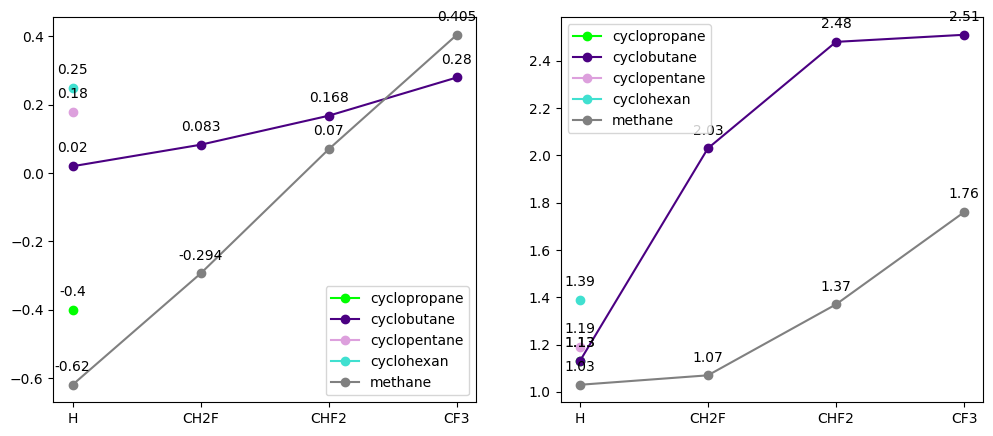

methane CF3 O=C(NCCC(F)(F)F)c1ccccc1 1.93 0.276
methane CHF2 O=C(NCCC(F)F)c1ccccc1 1.49 -0.067
methane CH2F O=C(NCCCF)c1ccccc1 1.28 -0.253
cyclopropane gem-CF2 O=C(NC1CC1(F)F)c1ccccc1 1.51 -0.014
cyclobutane gem-CF2 O=C(NC1CCC1(F)F)c1ccccc1 1.7 -0.037
cyclopentane gem-CF2 O=C(NC1CCCC1(F)F)c1ccccc1 1.87 0.008
cyclohexane gem-CF2 O=C(NC1CCCCC1(F)F)c1ccccc1 2.16 0.015
methane gem-CF2 CCC(F)(F)CNC(=O)c1ccccc1 2.04 0.115
cyclobutane CF3 O=C(N[C@@H]1CC[C@H]1C(F)(F)F)c1ccccc1 2.54 0.476
cyclobutane CHF2 O=C(N[C@@H]1CC[C@H]1C(F)F)c1ccccc1 1.94 0.001
cyclobutane CH2F O=C(N[C@@H]1CC[C@H]1CF)c1ccccc1 1.85 -0.018
cyclopropane CF3 O=C(N[C@@H]1C[C@H]1C(F)(F)F)c1ccccc1 1.79 0.458
cyclopropane CF3 O=C(N[C@H]1C[C@H]1C(F)(F)F)c1ccccc1 2.16 0.484
cyclopropane CHF2 O=C(N[C@@H]1C[C@H]1C(F)F)c1ccccc1 1.64 -0.096
cyclopropane CHF2 O=C(N[C@H]1C[C@H]1C(F)F)c1ccccc1 1.36 -0.254
cyclopropane CH2F O=C(N[C@@H]1C[C@H]1CF)c1ccccc1 1.41 -0.152
cyclopropane CH2F O=C(N[C@@H]1C[C@@H]1CF)c1ccccc1 1.12 -0.492
['H', 'CH2F'

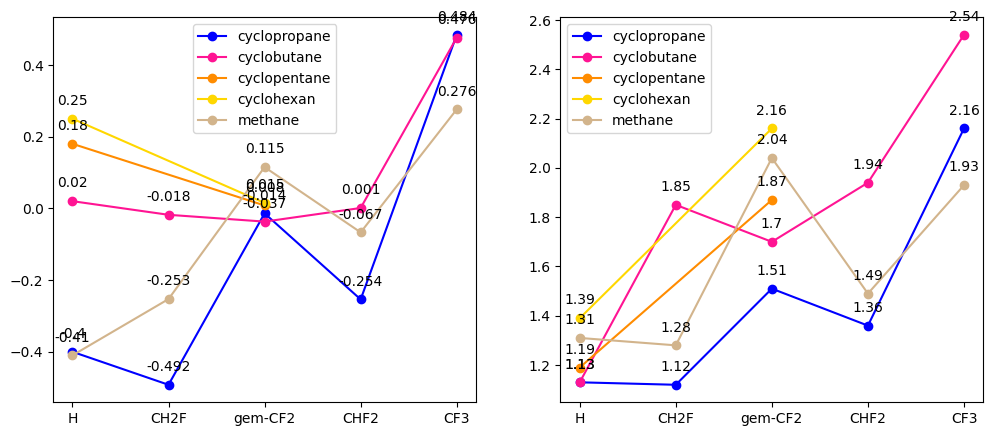

cyclobutane CF3 O=C(N[C@H]1C[C@H](C(F)(F)F)C1)c1ccccc1 2.82 0.371
cyclobutane CF3 O=C(N[C@H]1C[C@@H](C(F)(F)F)C1)c1ccccc1 2.62 0.371
cyclobutane CHF2 O=C(N[C@H]1C[C@H](C(F)F)C1)c1ccccc1 1.97 0.023
cyclobutane CHF2 O=C(N[C@H]1C[C@@H](C(F)F)C1)c1ccccc1 1.98 0.023
cyclobutane CH2F O=C(N[C@H]1C[C@H](CF)C1)c1ccccc1 1.78 -0.236
cyclobutane CH2F O=C(N[C@H]1C[C@@H](CF)C1)c1ccccc1 1.77 -0.236
methane CH2F O=C(NCCCCF)c1ccccc1 1.56 -0.138
methane CHF2 O=C(NCCCC(F)F)c1ccccc1 1.76 -0.083
methane CF3 O=C(NCCCC(F)(F)F)c1ccccc1 2.28 0.181
cyclobutane gem-CF2 O=C(NC1CC(F)(F)C1)c1ccccc1 1.94 -0.016
cyclopentane gem-CF2 O=C(NC1CCC(F)(F)C1)c1ccccc1 2.02 0.02
cyclohexane gem-CF2 O=C(NC1CCCC(F)(F)C1)c1ccccc1 2.31 0.063
methane gem-CF2 CC(F)(F)CCNC(=O)c1ccccc1 1.81 -0.067
['H', 'CH2F', 'gem-CF2', 'CHF2', 'CF3'] [0.02, -0.236, -0.016, 0.023, 0.371] [1.13, 1.77, 1.94, 1.98, 2.62]
['H', 'gem-CF2'] [0.18, 0.02] [1.13, 2.02]
['H', 'gem-CF2'] [0.25, 0.063] [1.39, 2.31]
['H', 'CH2F', 'gem-CF2', 'CHF2', 'CF3'] [-0.2

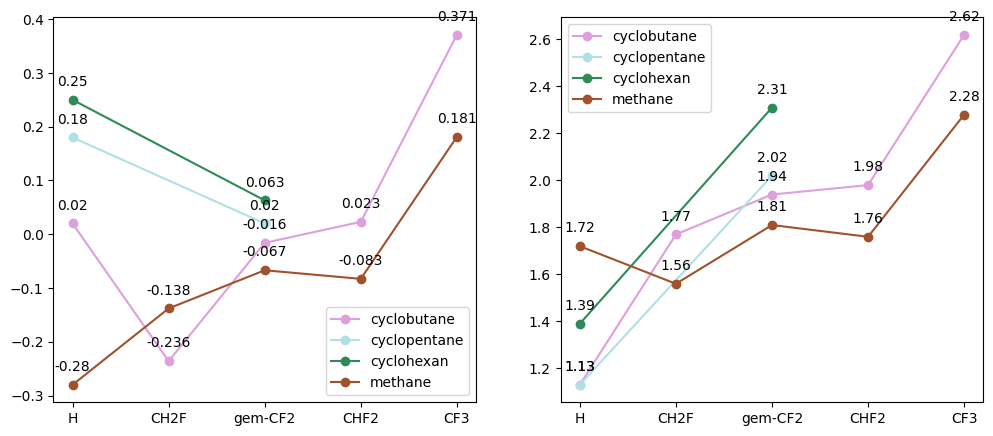

cyclohexane gem-CF2 O=C(NC1CCC(F)(F)CC1)c1ccccc1 2.31 0.042
['H', 'gem-CF2'] [0.25, 0.042] [1.39, 2.31]


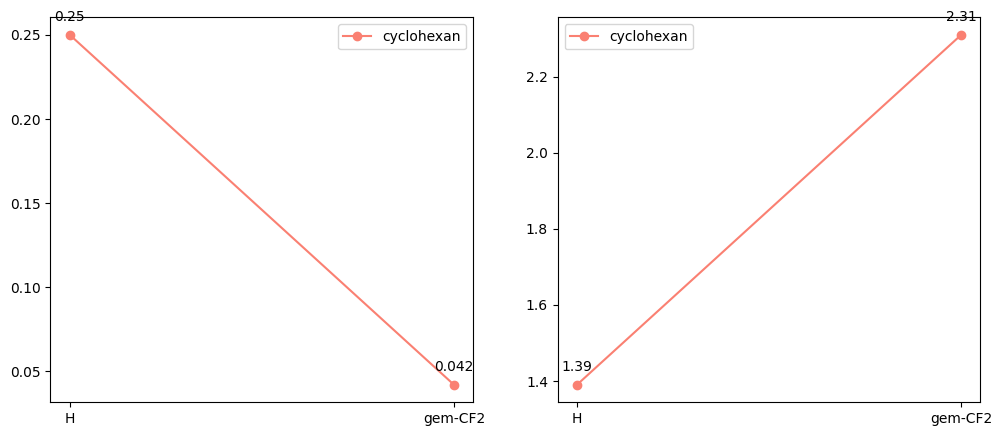

In [194]:
import matplotlib.pyplot as plt

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}}
cyclobutane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}, 3: {'H': [1.13]}}
cyclopentane_logP = {1: {'H': [1.19]}, 2: {'H': [1.19]}, 3: {'H': [1.13]}}
cyclohexan_logP = {1: {'H': [1.39]}, 2: {'H': [1.39]}, 3: {'H': [1.39]}, 4: {'H': [1.39]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}}

for distance_global in range(1, 5):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    for molecule_group, color, label, logP_dict in [(cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP),
                                                    (cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)]:
        X, y_relevance, y_logP = [], [], []
        if distance_global not in molecule_group:
            continue
        
        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue

            X.append(f_group_optimal)
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X, y_relevance, y_logP)
        ax1.plot(X, y_relevance, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax1.annotate(f"{str(y_relevance[i])}", (X[i], y_relevance[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.plot(X, y_logP, marker='o', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X)):
            ax2.annotate(f"{str(y_logP[i])}", (X[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()

    plt.show()
    
    


cyclobutane CF3 O=C(NC1(C(F)(F)F)CCC1)c1ccccc1 2.51 0.28
cyclobutane CHF2 O=C(NC1(C(F)F)CCC1)c1ccccc1 2.48 0.168
cyclobutane CH2F O=C(NC1(CF)CCC1)c1ccccc1 2.03 0.083
methane CF3 O=C(NCC(F)(F)F)c1ccccc1 1.76 0.405
methane CHF2 O=C(NCC(F)F)c1ccccc1 1.37 0.07
methane CH2F O=C(NCCF)c1ccccc1 1.07 -0.294
['H'] [-0.4]
['H', 'CH2F', 'CHF2', 'CF3'] [0.02, 0.083, 0.168, 0.28]
['H'] [0.18]
['H'] [0.25]
['H'] [0.28]
['H', 'CH2F', 'CHF2', 'CF3'] [-0.62, -0.294, 0.07, 0.405]
['H', 'CH2F', 'CHF2', 'CF3'] [[-0.4, 0.02, 0.18, 0.25, 0.28, -0.62], [0.083, -0.294], [0.168, 0.07], [0.28, 0.405]]


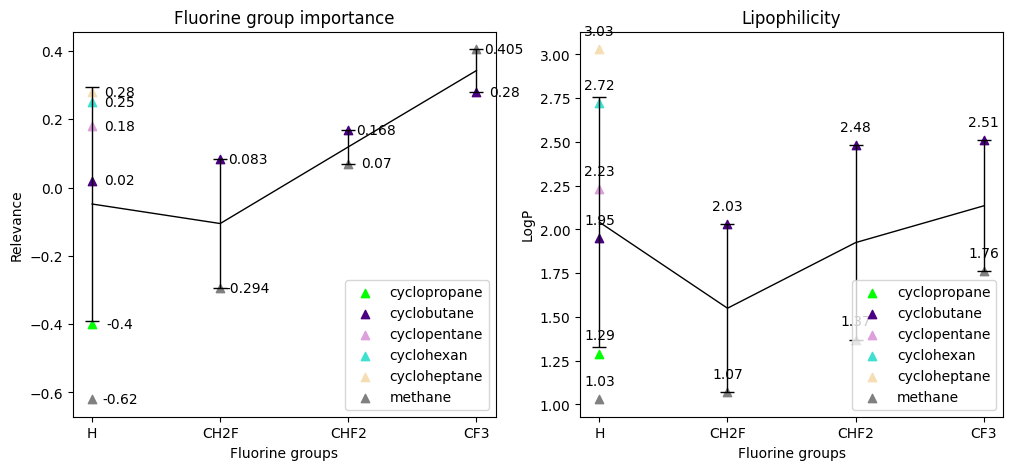

methane CF3 O=C(NCCC(F)(F)F)c1ccccc1 1.93 0.276
methane CHF2 O=C(NCCC(F)F)c1ccccc1 1.49 -0.067
methane CH2F O=C(NCCCF)c1ccccc1 1.28 -0.253
cyclopropane gem-CF2 O=C(NC1CC1(F)F)c1ccccc1 1.51 -0.014
cyclobutane gem-CF2 O=C(NC1CCC1(F)F)c1ccccc1 1.7 -0.037
cyclopentane gem-CF2 O=C(NC1CCCC1(F)F)c1ccccc1 1.87 0.008
cyclohexane gem-CF2 O=C(NC1CCCCC1(F)F)c1ccccc1 2.16 0.015
cyclohexane gem-CF2 O=C(NC1CCCCCC1(F)F)c1ccccc1 2.56 0.028
methane gem-CF2 CCC(F)(F)CNC(=O)c1ccccc1 2.04 0.115
cyclobutane CF3 O=C(N[C@@H]1CC[C@H]1C(F)(F)F)c1ccccc1 2.54 0.476
cyclobutane CHF2 O=C(N[C@@H]1CC[C@H]1C(F)F)c1ccccc1 1.94 0.001
cyclobutane CH2F O=C(N[C@@H]1CC[C@H]1CF)c1ccccc1 1.85 -0.018
cyclopropane CF3 O=C(N[C@@H]1C[C@H]1C(F)(F)F)c1ccccc1 1.79 0.458
cyclopropane CF3 O=C(N[C@H]1C[C@H]1C(F)(F)F)c1ccccc1 2.16 0.484
cyclopropane CHF2 O=C(N[C@@H]1C[C@H]1C(F)F)c1ccccc1 1.64 -0.096
cyclopropane CHF2 O=C(N[C@H]1C[C@H]1C(F)F)c1ccccc1 1.36 -0.254
cyclopropane CH2F O=C(N[C@@H]1C[C@H]1CF)c1ccccc1 1.41 -0.152
cyclopropane CH

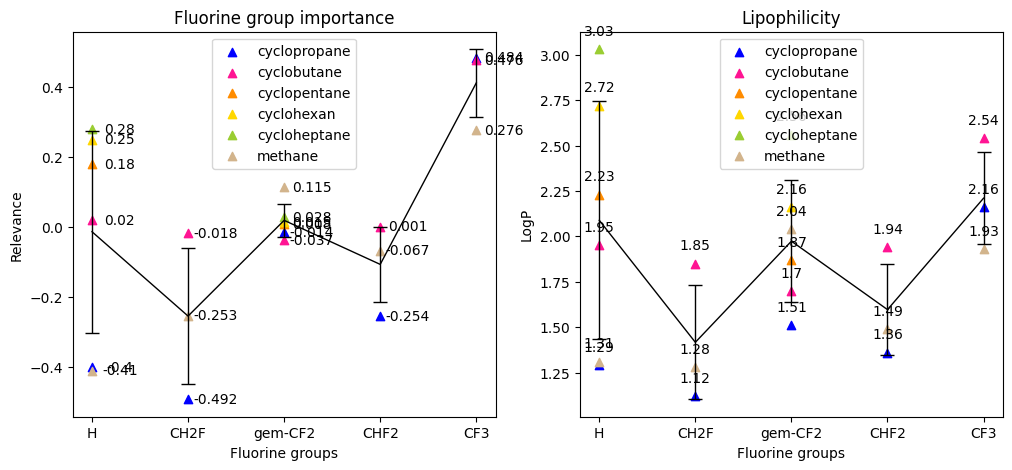

cyclobutane CF3 O=C(N[C@H]1C[C@H](C(F)(F)F)C1)c1ccccc1 2.82 0.371
cyclobutane CF3 O=C(N[C@H]1C[C@@H](C(F)(F)F)C1)c1ccccc1 2.62 0.371
cyclobutane CHF2 O=C(N[C@H]1C[C@H](C(F)F)C1)c1ccccc1 1.97 0.023
cyclobutane CHF2 O=C(N[C@H]1C[C@@H](C(F)F)C1)c1ccccc1 1.98 0.023
cyclobutane CH2F O=C(N[C@H]1C[C@H](CF)C1)c1ccccc1 1.78 -0.236
cyclobutane CH2F O=C(N[C@H]1C[C@@H](CF)C1)c1ccccc1 1.77 -0.236
methane CH2F O=C(NCCCCF)c1ccccc1 1.56 -0.138
methane CHF2 O=C(NCCCC(F)F)c1ccccc1 1.76 -0.083
methane CF3 O=C(NCCCC(F)(F)F)c1ccccc1 2.28 0.181
cyclobutane gem-CF2 O=C(NC1CC(F)(F)C1)c1ccccc1 1.94 -0.016
cyclopentane gem-CF2 O=C(NC1CCC(F)(F)C1)c1ccccc1 2.02 0.02
cyclohexane gem-CF2 O=C(NC1CCCC(F)(F)C1)c1ccccc1 2.31 0.063
cyclohexane gem-CF2 O=C(NC1CCCCC(F)(F)C1)c1ccccc1 2.57 0.097
methane gem-CF2 CC(F)(F)CCNC(=O)c1ccccc1 1.81 -0.067
['H', 'CH2F', 'gem-CF2', 'CHF2', 'CF3'] [0.02, -0.236, -0.016, 0.023, 0.371]
['H', 'gem-CF2'] [0.18, 0.02]
['H', 'gem-CF2'] [0.25, 0.063]
['H', 'gem-CF2'] [0.28, 0.097]
['H', 'CH2

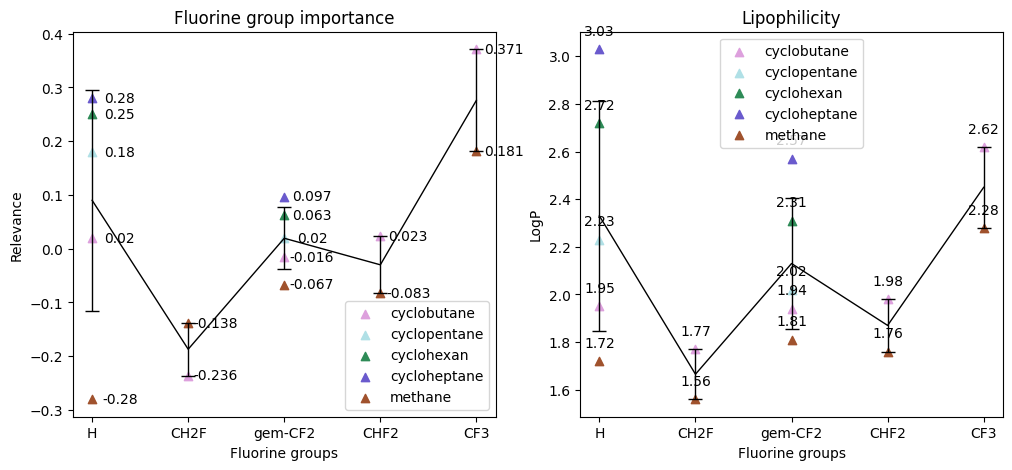

cyclohexane gem-CF2 O=C(NC1CCC(F)(F)CC1)c1ccccc1 2.31 0.042
cyclohexane gem-CF2 O=C(NC1CCCC(F)(F)CC1)c1ccccc1 2.5 0.094
['H', 'gem-CF2'] [0.25, 0.042]
['H', 'gem-CF2'] [0.28, 0.094]
['H', 'gem-CF2'] [[0.25, 0.28], [0.042, 0.094]]


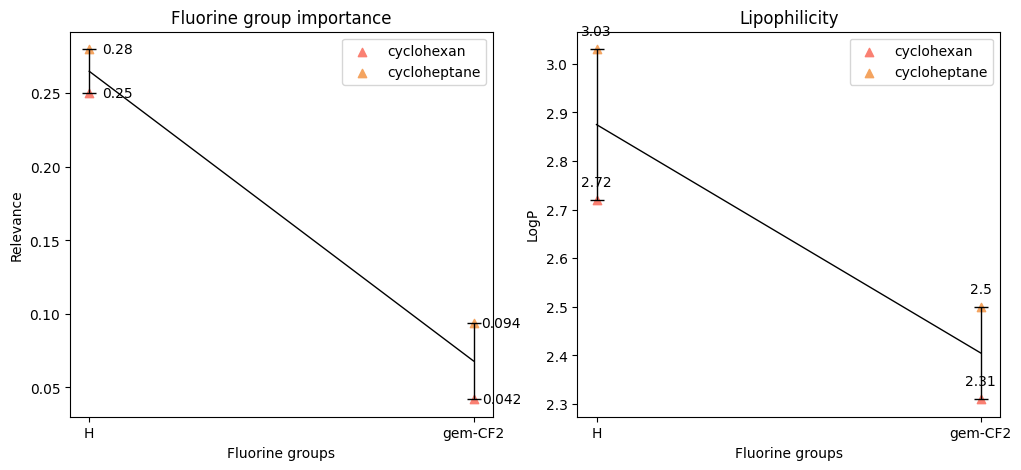

In [195]:
import matplotlib.pyplot as plt
import numpy as np

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
cycloheptane_color = {1: 'wheat', 2: 'yellowgreen', 3: 'slateblue', 4: 'sandybrown'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
cycloheptane_name = 'cycloheptane'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.29]}, 2: {'H': [1.29]}}
cyclobutane_logP = {1: {'H': [1.95]}, 2: {'H': [1.95]}, 3: {'H': [1.95]}}
cyclopentane_logP = {1: {'H': [2.23]}, 2: {'H': [2.23]}, 3: {'H': [2.23]}}
cyclohexan_logP = {1: {'H': [2.72]}, 2: {'H': [2.72]}, 3: {'H': [2.72]}, 4: {'H': [2.72]}}
cycloheptane_logP = {1: {'H': [3.03]}, 2: {'H': [3.03]}, 3: {'H': [3.03]}, 4: {'H': [3.03]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}}

for distance_global in range(1, 5):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP),
                                                    (cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    
